In [ ]:
!pip install pytorch-transformers
import pandas as pd

train_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/train_d.csv")
validation_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/validation_d.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/test_d.csv")

     |████████████████████████████████| 184kB 12.7MB/s 
     |████████████████████████████████| 890kB 25.8MB/s 
     |████████████████████████████████| 133kB 32.4MB/s 
     |████████████████████████████████| 1.2MB 48.8MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 7.3MB 53.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=caa7230056d8cbe1a04592a028ffbaea5f9bedfb30b4cd6a04c8a222847f0850
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
ERROR: botocore 1.20.32 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
train_dataset

,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...,...
2995,2995,so what's the problem?,i used all my savings on this one company.
2996,2996,i used all my savings on this one company.,you put all your eggs into one basket.
2997,2997,you put all your eggs into one basket.,"if the company goes out of business, i'll have..."
2998,2998,"if the company goes out of business, i'll have...","oh, you'll have somethingyou'll have a lesson..."


In [ ]:
validation_dataset

,Unnamed: 0,question,answer
0,3000,what happened to your plans?,i got a d in college chemistry.
1,3001,i got a d in college chemistry.,"well, a d is better than an f."
2,3002,"well, a d is better than an f.",a tutor helped me get the d!
3,3003,a tutor helped me get the d!,"so, you didn't become a doctor."
4,3004,"so, you didn't become a doctor.",and now i'm glad that i didn't.
...,...,...,...
495,3495,"do you mean on measures 1, 2, and 3?","yes. the ones that will improve our schools, r..."
496,3496,"yes. the ones that will improve our schools, r...",you mean the measures that will raise our taxes.
497,3497,you mean the measures that will raise our taxes.,but the tv ads say that our taxes will not inc...
498,3498,but the tv ads say that our taxes will not inc...,do you believe the tv ads?


In [ ]:
test_dataset

,Unnamed: 0,question,answer
0,3500,i like the one where the fireman tells us why ...,don't believe him! whatever the tv ads tell yo...
1,3501,don't believe him! whatever the tv ads tell yo...,"but the title of measure 1 is ""better schools ..."
2,3502,"but the title of measure 1 is ""better schools ...","the title should be ""better schools at huge co..."
3,3503,"the title should be ""better schools at huge co...",i can't believe that they would lie to us.
4,3504,i can't believe that they would lie to us.,of course they liethat's what politicians do!
...,...,...,...
220,3720,that's a good question. maybe it's not old age.,are you right-handed?
221,3721,are you right-handed?,yes. all my life.
222,3722,yes. all my life.,you're wearing out your right hand. stop using...
223,3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [ ]:
%cd /content/drive/MyDrive/new_exp/chatbot/LSTM_chatbot/
from model import LSTMEncoderDecoder
from exp import train, test_generation, QandA

/content/drive/MyDrive/new_exp/chatbot/LSTM_chatbot


100%|██████████| 231508/231508 [00:00<00:00, 675600.50B/s]


train_loss :  10.323040008544922
validation_loss 10.318155288696289
~~~~
question :  not to mention 40, 000 wounded soldiers.
gold answer :  but bush visited some of them in the hospital once.
Generated Answer :  ##aldi translucent celeste whereabouts to irvine approach designation interpretations rosewood skills skills ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld ld
~~~~
elapsed time :  0.5353178977966309
train_loss :  4.339982032775879
validation_loss 5.083067417144775
~~~~
question :  it's too dangerous for kids and pets.
gold answer :  people need to cover their trash cans.
Generated Answer :  i't.
~~~~
elapsed time :  205.5347068309784
train_loss :  3.689072608947754
validation_loss 4.787749767303467
~~~~
question :  voting is so easy. you can even mail your ballot in.
gold answer :  all you have to do is vote and put a stamp on it.
Generated Answer :  i't.
~~~~
elapsed time :  412.598974943161
train_loss :  2.97962427

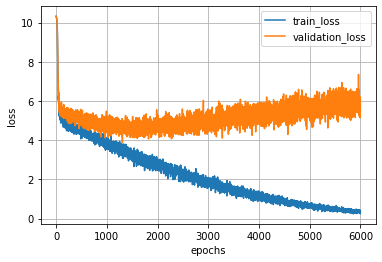

In [ ]:
batch_size = 40
epochs = 6000
show_generate = 600
gpu = True
lr = 0.0001
model = LSTMEncoderDecoder(d_model=512)
model = train(model, gpu, lr, batch_size, epochs, train_dataset, validation_dataset, show_generate)

In [ ]:
for i in range(len(test_dataset)):
    test_generation(model, test_dataset, gpu, i)

~~~~
question :  i like the one where the fireman tells us why we should vote yes.
gold answer :  don't believe him! whatever the tv ads tell you, the opposite is true.
Generated Answer :  the sports says.
~~~~
question :  don't believe him! whatever the tv ads tell you, the opposite is true.
gold answer :  but the title of measure 1 is " better schools at no cost. "
Generated Answer :  thank you. english
~~~~
question :  but the title of measure 1 is " better schools at no cost. "
gold answer :  the title should be " better schools at huge cost. "
Generated Answer :  you can try to eat.
~~~~
question :  the title should be " better schools at huge cost. "
gold answer :  i can't believe that they would lie to us.
Generated Answer :  yes, it.
~~~~
question :  i can't believe that they would lie to us.
gold answer :  of course they liethat's what politicians do!
Generated Answer :  that will be something.
~~~~
question :  i have a stomachache.
gold answer :  is it something you ate?
Gene

In [ ]:
def ans(question):
    answer = QandA(model, question, gpu, True)

In [ ]:
ans("Hello.")

Q :  Hello.
A :  so will you tomorrow?


In [ ]:
ans("How are you?")

Q :  How are you?
A :  i'm for that.


In [ ]:
ans("I am not good")

Q :  I am not good
A :  you.


In [ ]:
ans("do you like soccer?")

Q :  do you like soccer?
A :  no, i thinky.


In [ ]:
ans("where?")

Q :  where?
A :  they reading.


In [ ]:
ans("do you know?")

Q :  do you know?
A :  yes. i love lunch.


In [ ]:
ans("what are you doing?")

Q :  what are you doing?
A :  i'm in a airport.


In [ ]:
ans("what?")

Q :  what?
A :  they got at the street.


In [ ]:
ans("?")

Q :  ?
A :  when you?


In [ ]:
ans("no.")

Q :  no.
A :  how kind?


In [ ]:
ans("yes.")

Q :  yes.
A :  is it?


In [ ]:
ans("yes?")

Q :  yes?
A :  are you reading thiss on that.


In [ ]:
ans = QandA(model, "hello?", gpu, True)
for i in range(20):
    ans = QandA(model, ans, gpu, False)

Q :  hello?
A :  you don't like any myself tv.
A :  oh. i have to take off the minutes.
A :  i are things.
A :  where do you?
A :  i always up.
A :  don't.
A :  not neither.
A :  but why was you at the friend.
A :  the car isn.
A :  so does after?
A :  i don't know.
A :  if you't see?
A :  i'm in it.
A :  you don't t.
A :  why not?
A :  i might't.
A :  i't know.
A :  i asked you.
A :  i't you up.
A :  okay. i'll give an hour, the world.
A :  who can up on arounds.
